# **Case Study - Diamond Price Prediction**

### **Business Understanding**

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

### **Understanding the 4 C's**
- Cut
- Color
- Clarity
- Carat

<img style="float: left;" width="300" height="400" src="img/color_.jpg">
<img style="float: left;" width="300" height="400" src="img/clarity_.jpg">
<img width="300" height="400" src="img/carat_.jpg">


Credits - https://www.brides.com/story/choosing-engagement-ring-four-cs


### **Problem Statement**
**Build a system which can take features of diamond like carat, cut, color, clarity, x, y, z, etc.. and predicts the `price` of diamond.**

### **Case Study Agenda**

In this notebook, you will learn:
1. How to split the given data into Train and Test?
2. How to perform Feature Engineering on Categorical and Numerical Features?
    - Categorical Columns - OneHotEncoding and LabelEncoding
    - Numerical Columns - Standardization and Normalization
3. How to build ML models that can predict Price of a Diamond?

## **Import the required Libraries**

In [234]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **Step 1 - Load the Data**

In [235]:
df = pd.read_csv(r"C:\Users\SURESH\Inno 271-273\GenAI Internship\Task 5\diamonds.csv")

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Description
Kindly find the data description for the features below:

| Feature | Description |
| :---: | :--- | 
| **price** | price in US dollars `($ 326 - $ 18,823)` |
| **carat** | weight of the diamond `(0.2 - 5.01)` |
| **cut** | quality of the cut `(Fair, Good, Very Good, Premium, Ideal)` |
| **color** | diamond colour, `(J (worst) to D (best))` |
| **clarity** | a measurement of how clear the diamond is `(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))` |
| **x** | length in mm `(0 - 10.74)` |
| **y** | width in mm `(0 - 58.9)` |
| **z** | depth in mm `(0 - 31.8)` |
| **depth** | total depth percentage = z / mean(x, y) = 2 * z / (x + y) `(43 - 79)` |
| **table** | width of top of diamond relative to widest point `(43 - 95)` |

## **Step 2 - Exploratory Data Analysis**

In [236]:
df.shape

(53940, 10)

In [237]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<Axes: title={'center': 'Clarity'}, xlabel='clarity', ylabel='count'>

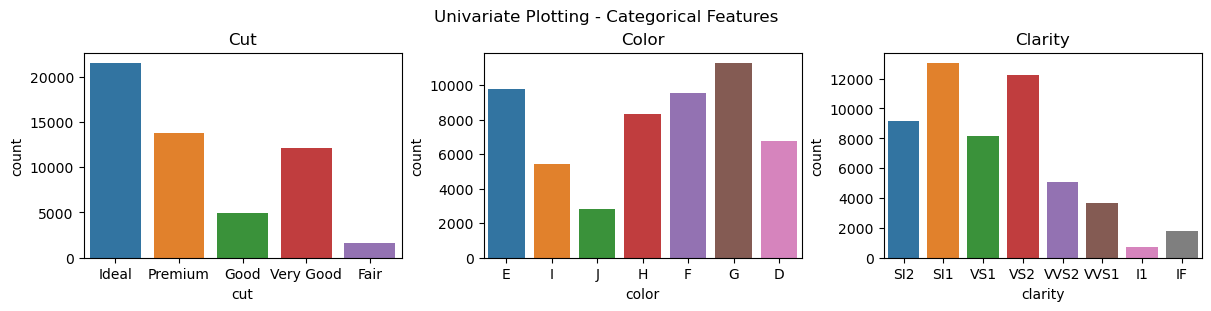

In [239]:
# Univariate - Categorical Analysis

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("Cut")
sns.countplot(data=df, x='cut', ax=axs[0])

axs[1].set_title("Color")
sns.countplot(data=df, x='color', ax=axs[1])

axs[2].set_title("Clarity")
sns.countplot(data=df, x='clarity', ax=axs[2])

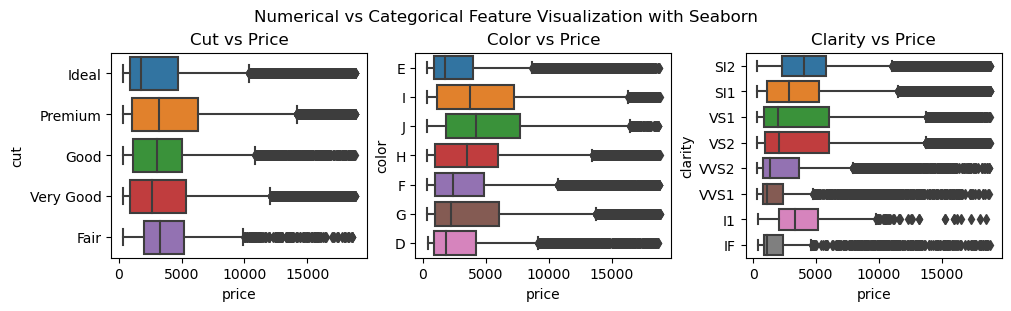

In [240]:
# Bivariate - Categorical vs Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Cut vs Price")
sns.boxplot(data=df, x='price', y='cut', ax=axs[0])

axs[1].set_title("Color vs Price")
sns.boxplot(data=df, x='price', y='color', ax=axs[1])

axs[2].set_title("Clarity vs Price")
sns.boxplot(data=df, x='price', y='clarity', ax=axs[2])

plt.show()

<Axes: title={'center': 'Table'}, xlabel='table', ylabel='Count'>

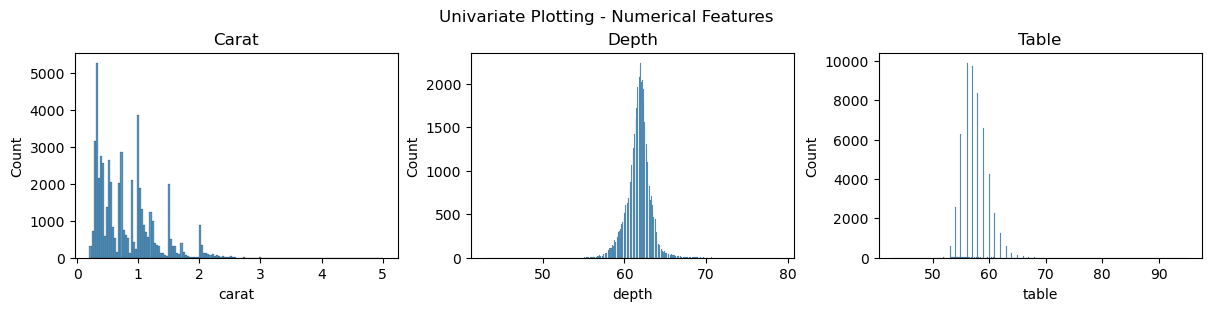

In [241]:
# Univariate - Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("Carat")
sns.histplot(data=df, x='carat', ax=axs[0])

axs[1].set_title("Depth")
sns.histplot(data=df, x='depth', ax=axs[1])

axs[2].set_title("Table")
sns.histplot(data=df, x='table', ax=axs[2])

C:\Users\SURESH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


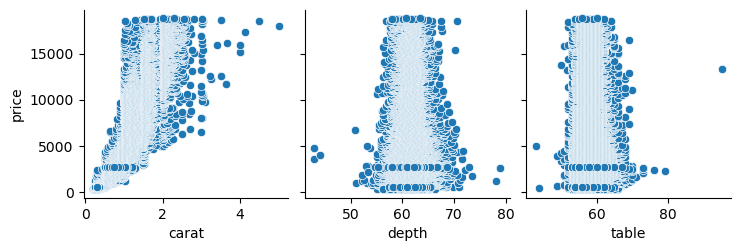

In [242]:
# Bivariate - Numerical vs Numerical Analysis

sns.pairplot(data=df,
           x_vars=['carat', 'depth', 'table'],
           y_vars='price')

<Axes: title={'center': 'Z'}, xlabel='z', ylabel='Count'>

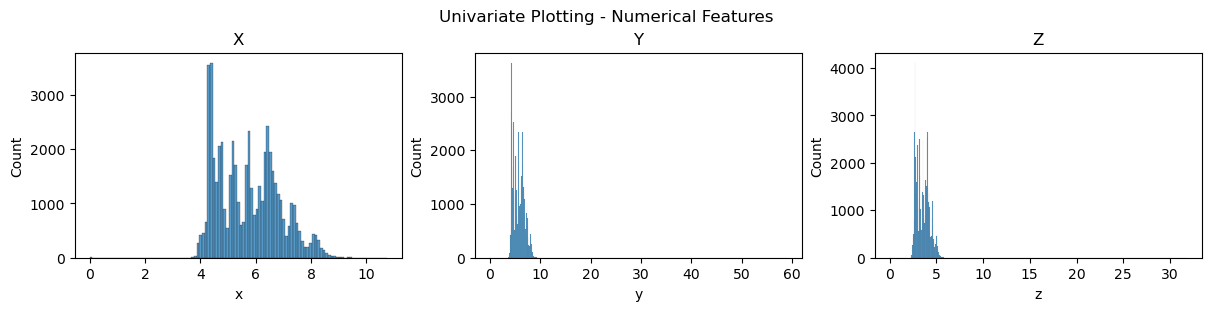

In [243]:
# Univariate - Numerical Analysis

fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("X")
sns.histplot(data=df, x='x', ax=axs[0])

axs[1].set_title("Y")
sns.histplot(data=df, x='y', ax=axs[1])

axs[2].set_title("Z")
sns.histplot(data=df, x='z', ax=axs[2])

C:\Users\SURESH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


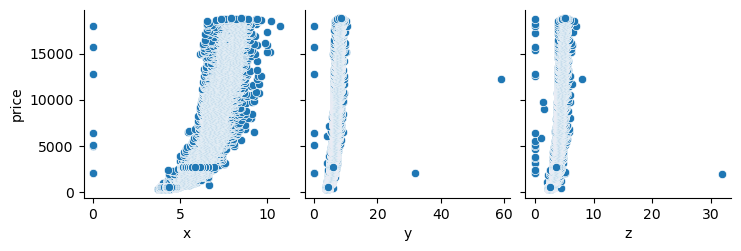

In [244]:
# Bivariate - Numerical vs Numerical Analysis

sns.pairplot(data=df,
           x_vars=['x', 'y', 'z'],
           y_vars='price')

## **Data Preparation and Model Building Pipeline**

1. Identifying the inputs (X) and output (y)
2. Split into train and test (X_train, X_test, y_train, y_test)
3. Data Preparation: Data Cleaning and Feature Engineering.
    - Clean the training data
    - Preprocess the training data (X_train_transformed)
4. Training Phase: Build a model
5. Preprocess the test data (X_test_transformed)
6. Predict on unseen data
7. Evaluate the model performance

**Installing sklearn Library**  
**`!pip install -U scikit-learn`**

In [245]:
import sklearn

print(sklearn.__version__)

1.3.0


## **Step 3 - Segregate Inputs (X) and Output (y)**

In [246]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns=['price'])

y = df['price']

## **Step 4 - Split the data into Train and Test**

In [247]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


## **Step 5 - Apply Data Preparation on Training Data**

We will follow the below mentioned strategy:
1. Separate Numerical and Categorical Features
2. Feature Engineering/Extraction/Transformation
    - Applying Standardization on Numerical Features
    - Apply LabelEncoding on Categorical Features
  
**Note: We have skipped the Feature Cleaning Step under Data Preparation in this notebook.**

In [248]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

#### **Separate Numerical and Categorical Features**

In [249]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [250]:
X_train_cat.head()

,cut,color,clarity
441,Premium,H,SI2
50332,Very Good,D,SI1
35652,Ideal,G,VVS2
9439,Very Good,H,VS1
15824,Good,F,VS2


In [251]:
X_train_num.head()

,carat,depth,table,x,y,z
441,0.89,60.2,59.0,6.26,6.23,3.76
50332,0.70,64.0,53.0,5.57,5.61,3.58
35652,0.31,62.7,57.0,4.33,4.31,2.71
9439,0.90,62.3,59.0,6.12,6.17,3.83
15824,1.01,60.6,62.0,6.52,6.49,3.94


#### **Numerical Feature Transformation (Implementation Available Below)**
1. Normalization
2. Standardization (We will use this method in this project)

#### **Categorical Feature Transformation (Implementation Available Below)**
1. One Hot Encoding
2. Label Encoding
3. Ordinal Encoding (We will us this method in this project)

#### **Numerical Feature Transformation: Applying Normalization `(Note: We won't use Normalization Transformation)`**

In [252]:
# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train_num), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,carat,depth,table,x,y,z
441,0.143451,0.477778,0.444444,0.582868,0.105772,0.118239
50332,0.103950,0.583333,0.277778,0.518622,0.095246,0.112579
35652,0.022869,0.547222,0.388889,0.403166,0.073175,0.085220
9439,0.145530,0.536111,0.444444,0.569832,0.104754,0.120440
15824,0.168399,0.488889,0.527778,0.607076,0.110187,0.123899


In [253]:
# Let's now analyse the properties of 'minmax_scaler'

print("Number of Numerical Features:", minmax_scaler.n_features_in_)
print("Output Feature Names:", minmax_scaler.get_feature_names_out())
print("Minimum of each column:", minmax_scaler.data_min_)
print("Maximum of each column:", minmax_scaler.data_max_)

Number of Numerical Features: 6
Output Feature Names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Minimum of each column: [ 0.2 43.  43.   0.   0.   0. ]
Maximum of each column: [ 5.01 79.   79.   10.74 58.9  31.8 ]


In [254]:
# Let's also describe the transformed data statistics

X_train_num_transformed.describe().round(2)

,carat,depth,table,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,0.12,0.52,0.40,0.53,0.10,0.11
std,0.10,0.04,0.06,0.10,0.02,0.02
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.04,0.50,0.36,0.44,0.08,0.09
50%,0.10,0.52,0.39,0.53,0.10,0.11
75%,0.17,0.54,0.44,0.61,0.11,0.13
max,1.00,1.00,1.00,1.00,1.00,1.00


#### **Numerical Feature Transformation: Applying Standardization**

In [255]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,carat,depth,table,x,y,z
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137


In [256]:
# Let's now analyse the properties of 'std_scaler'

print("Number of Numerical Features:", std_scaler.n_features_in_)
print("Output Feature Names:", std_scaler.get_feature_names_out())
print("Mean of each column:", std_scaler.mean_)
print("Std of each column:", np.sqrt(std_scaler.var_))

Number of Numerical Features: 6
Output Feature Names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Mean of each column: [ 0.79755135 61.75490051 57.45233469  5.72994018  5.73356989  3.53818267]
Std of each column: [0.47428986 1.43216771 2.22888453 1.1225301  1.15188634 0.7097527 ]


In [257]:
# Let's also describe the transformed data statistics

X_train_num_transformed.describe().round(2)

,carat,depth,table,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.26,-13.10,-6.48,-5.10,-4.98,-4.99
25%,-0.84,-0.46,-0.65,-0.91,-0.88,-0.89
50%,-0.21,0.10,-0.20,-0.04,-0.02,-0.03
75%,0.51,0.52,0.69,0.72,0.70,0.71
max,8.88,12.04,9.67,4.46,46.16,39.82


#### **Categorical Feature Transformation: Applying One-Hot Encoding `(Note: We won't use OHE Transformation)`**

**Parameters**
1. sparse_output: bool, default=True
    - When True, it returns a scipy.sparse.csr_matrix, i.e. a sparse matrix in "Compressed Sparse Row" (CSR) format.
2. drop: {'first', 'if_binary'}, default=None
    - None: retain all features (the default)
    - 'first': drop the first category in each feature. If only one category is present, the feature will be dropped entirely.
    - 'if_binary': drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.
3. min_frequency: int, default=None
    - Categories with a smaller cardinality will be considered infrequent.
4. handle_unknown: {'error', 'ignore', 'infrequent_if_exist'}, default='error'
    - 'error': Raise an error if an unknown category is present during transform.
    - 'ignore': When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros.
    - 'infrequent_if_exist': When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. 

In [258]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, 
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (40455, 3)
Shape of Data after Transformation: (40455, 20)


,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
441,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35652,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [259]:
# Let's now analyse the properties of 'onehot_encoder'

print("Applied encoding on:", onehot_encoder.feature_names_in_)
print("Unique Categories:", onehot_encoder.categories_)
print("Feature Names after encoding:", onehot_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Feature Names after encoding: ['cut_Fair' 'cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good' 'color_D'
 'color_E' 'color_F' 'color_G' 'color_H' 'color_I' 'color_J' 'clarity_I1'
 'clarity_IF' 'clarity_SI1' 'clarity_SI2' 'clarity_VS1' 'clarity_VS2'
 'clarity_VVS1' 'clarity_VVS2']


#### **Categorical Feature Transformation: Applying One-Hot Encoding with `drop='first'` `(Note: We won't use OHE Transformation)`**

In [260]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop='first', 
                               sparse_output=False, 
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (40455, 3)
Shape of Data after Transformation: (40455, 17)


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
441,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35652,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9439,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [261]:
# Let's now analyse the properties of 'onehot_encoder'

print("Applied encoding on:", onehot_encoder.feature_names_in_)
print("Unique Categories:", onehot_encoder.categories_)
print("Feature Names after encoding:", onehot_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Feature Names after encoding: ['cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good' 'color_E' 'color_F'
 'color_G' 'color_H' 'color_I' 'color_J' 'clarity_IF' 'clarity_SI1'
 'clarity_SI2' 'clarity_VS1' 'clarity_VS2' 'clarity_VVS1' 'clarity_VVS2']


#### **Categorical Feature Transformation: Applying One-Hot Encoding with `drop='first'` and `min_frequency=3000` `(Note: We won't use OHE Transformation)`**

In [262]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop='first', 
                               min_frequency=3000, 
                               sparse_output=False, 
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (40455, 3)
Shape of Data after Transformation: (40455, 15)


,cut_Ideal,cut_Premium,cut_Very Good,cut_infrequent_sklearn,color_E,color_F,color_G,color_H,color_I,color_infrequent_sklearn,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_infrequent_sklearn
441,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35652,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [263]:
# Let's now analyse the properties of 'onehot_encoder'

print("Applied encoding on:", onehot_encoder.feature_names_in_)
print("Unique Categories:", onehot_encoder.categories_)
print("Infrequent Categories", onehot_encoder.infrequent_categories_)
print("Feature Names after encoding:", onehot_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Infrequent Categories [array(['Fair'], dtype=object), array(['J'], dtype=object), array(['I1', 'IF', 'VVS1'], dtype=object)]
Feature Names after encoding: ['cut_Ideal' 'cut_Premium' 'cut_Very Good' 'cut_infrequent_sklearn'
 'color_E' 'color_F' 'color_G' 'color_H' 'color_I'
 'color_infrequent_sklearn' 'clarity_SI2' 'clarity_VS1' 'clarity_VS2'
 'clarity_VVS2' 'clarity_infrequent_sklearn']


#### **Categorical Feature Transformation: Applying Label Encoding `(Note: We won't use Label Encoding Transformation)`**

Encode target labels with value between 0 and n_classes-1.

**As per documentation, this transformer should be used to encode target values, i.e. y, and not the input X.**

In [264]:
example_df = pd.DataFrame({'Rating': ['Excellent', 'Average', 'Bad', 'Average', 'Excellent', 'Bad', 'Good', 'Good']})

example_df

,Rating
0,Excellent
1,Average
2,Bad
3,Average
4,Excellent
5,Bad
6,Good
7,Good


In [265]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

example_df['Ratings - Label Encoded'] = label_encoder.fit_transform(example_df['Rating'])

example_df

,Rating,Ratings - Label Encoded
0,Excellent,2
1,Average,0
2,Bad,1
3,Average,0
4,Excellent,2
5,Bad,1
6,Good,3
7,Good,3


#### **Categorical Feature Transformation: Applying Ordinal Encoding**

As the three categorical features are ordinal, we will proceed with the Ordinal Encoding instead of One-Hot Encoding or Label Encoding

**Parameters**
1. categories: 'auto' or a list of array-like, default='auto'
    - 'auto' : Determine categories automatically from the training data.
    - list : This helps define ordering for categorical columns (lowest to highest)
2. handle_unknown: {'error', 'use_encoded_value'}, default='error'
    - When set to ‘error’ an error will be raised in case an unknown categorical feature is present during transform. When set to ‘use_encoded_value’, the encoded value of unknown categories will be set to the value given for the parameter `unknown_value`.
3. unknown_value: int, default=None
    - When the parameter *handle_unknown* is set to *use_encoded_value*, this parameter is required and will set the encoded value of unknown categories. 
4. min_frequency: int, default=None
    - Categories with a smaller cardinality will be considered infrequent.
5. encoded_missing_value: int
    - Encoded value of missing categories.

In [266]:
# Define the ordering for categorical columns (lowest to highest)

cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [267]:
# Create the OrdinalEncoder with the specified categories
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories],  
                                 handle_unknown="use_encoded_value",
                                 unknown_value=-1, 
                                 encoded_missing_value=-5)

# Apply the encoding
X_train_cat_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat), 
                                     columns=ordinal_encoder.get_feature_names_out(), 
                                     index = X_train_cat.index)

X_train_cat_transformed.head()

,cut,color,clarity
441,3.0,2.0,1.0
50332,2.0,6.0,2.0
35652,4.0,3.0,5.0
9439,2.0,2.0,4.0
15824,1.0,4.0,3.0


In [268]:
# Let's now analyse the properties of 'ordinal_encoder'

print("Applied encoding on:", ordinal_encoder.feature_names_in_)
print("Unique Categories:", ordinal_encoder.categories_)
print("Feature Names after encoding:", ordinal_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object), array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype=object), array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
      dtype=object)]
Feature Names after encoding: ['cut' 'color' 'clarity']


#### **Concatenate `X_train_num_transformed` and `X_train_cat_transformed`**

In [269]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
441,0.194920,-1.085697,0.694368,0.472201,0.430971,0.312528,3.0,2.0,1.0
50332,-0.205679,1.567623,-1.997562,-0.142482,-0.107276,0.058918,2.0,6.0,2.0
35652,-1.027961,0.659908,-0.202942,-1.247129,-1.235860,-1.166861,4.0,3.0,5.0
9439,0.216004,0.380611,0.694368,0.347483,0.378883,0.411154,2.0,2.0,4.0
15824,0.447930,-0.806400,2.040332,0.703821,0.656688,0.566137,1.0,4.0,3.0


## **Step 7 - Apply Data Preparation on Test Data**

**Note that, Step-6 is discussed after this.**

In [270]:
# Separate Categorical and Numerical Features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [271]:
# Apply transformation on Numerical data

X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                   columns = std_scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,carat,depth,table,x,y,z
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064


In [272]:
# Apply transformation on Categorical data

X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat), 
                                   columns = ordinal_encoder.get_feature_names_out(), 
                                   index = X_test_cat.index)

X_test_cat_transformed.head()

,cut,color,clarity
10176,4.0,2.0,1.0
16083,4.0,2.0,2.0
13420,3.0,1.0,2.0
20407,4.0,4.0,2.0
8909,2.0,4.0,3.0


In [273]:
# Concatinate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
10176,0.637687,0.171139,-1.100252,0.783997,0.795591,0.805657,4.0,2.0,1.0
16083,1.038286,0.590084,-0.651597,1.095792,1.038670,1.143803,4.0,2.0,2.0
13420,0.848529,-0.457279,0.245713,1.024525,0.925812,0.904283,3.0,1.0,2.0
20407,1.481053,-0.596928,-0.651597,1.514489,1.411971,1.355144,4.0,4.0,2.0
8909,0.216004,-0.038334,-0.202942,0.392025,0.413609,0.397064,2.0,4.0,3.0


## **Step 6, 8 and 9 - Training and Testing Phase (Linear Regression)**

In [274]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 806.1632101815305

CPU times: total: 0 ns
Wall time: 15.3 ms


In [275]:
%%time

y_train_pred = regressor.predict(X_train_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_train, y_train_pred))

Model's Error: 806.3663373828043
CPU times: total: 0 ns
Wall time: 7.11 ms


In [276]:
output_df = pd.DataFrame({'Actual': y_test})

In [277]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
10176,4733,5131.107679
16083,6424,7294.764679
13420,5510,6025.770217
20407,8770,9927.067650
8909,4493,4732.652453
...,...,...
52283,2494,3348.611770
10789,4861,4480.310760
1190,2932,3870.804522
3583,3422,4198.061830


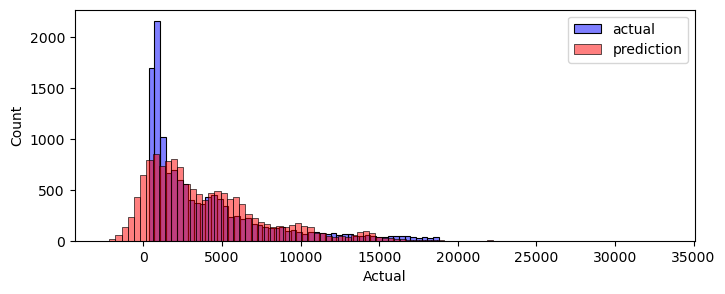

In [278]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Step 6, 8 and 9 - Training and Testing Phase (KNN Regression)**

In [279]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 381.08851316277344

CPU times: total: 703 ms
Wall time: 751 ms


In [280]:
%%time

y_train_pred = regressor.predict(X_train_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_train, y_train_pred))

Model's Error: 310.5582993449512
CPU times: total: 1.69 s
Wall time: 1.8 s


In [281]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
10176,4733,5131.107679,4664.4
16083,6424,7294.764679,6278.2
13420,5510,6025.770217,5180.8
20407,8770,9927.067650,12080.0
8909,4493,4732.652453,6015.2
...,...,...,...
52283,2494,3348.611770,2445.2
10789,4861,4480.310760,4301.8
1190,2932,3870.804522,3569.6
3583,3422,4198.061830,3228.2


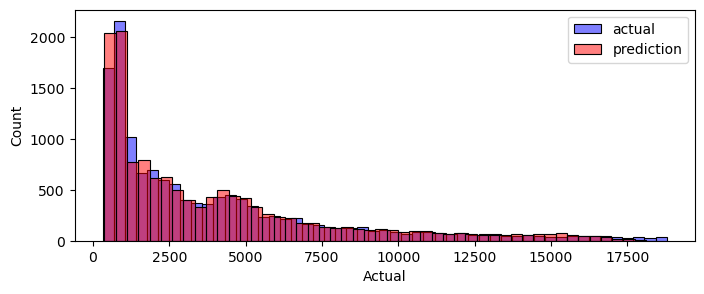

In [282]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Step 6, 8 and 9 - Training and Testing Phase (DT Regression)**

In [283]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 351.832665925102

CPU times: total: 562 ms
Wall time: 585 ms


In [284]:
%%time

y_train_pred = regressor.predict(X_train_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_train, y_train_pred))

Model's Error: 0.4102088740575949
CPU times: total: 15.6 ms
Wall time: 24.7 ms


In [285]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
10176,4733,5131.107679,4664.4,4620.0
16083,6424,7294.764679,6278.2,7277.0
13420,5510,6025.770217,5180.8,5226.0
20407,8770,9927.067650,12080.0,12477.0
8909,4493,4732.652453,6015.2,4134.0
...,...,...,...,...
52283,2494,3348.611770,2445.2,2469.0
10789,4861,4480.310760,4301.8,4166.0
1190,2932,3870.804522,3569.6,2721.0
3583,3422,4198.061830,3228.2,2852.0


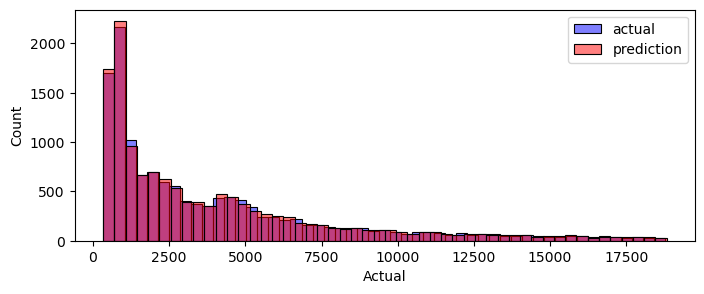

In [286]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Step 6, 8 and 9 - Training and Testing Phase (Random Forest Regression)**

In [287]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 269.56065853652797

CPU times: total: 41 s
Wall time: 41.6 s


In [288]:
%%time

y_train_pred = regressor.predict(X_train_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_train, y_train_pred))

Model's Error: 100.01294609942852
CPU times: total: 1.44 s
Wall time: 1.46 s


In [289]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
10176,4733,5131.107679,4664.4,4620.0,4740.440000
16083,6424,7294.764679,6278.2,7277.0,7136.310000
13420,5510,6025.770217,5180.8,5226.0,5239.000000
20407,8770,9927.067650,12080.0,12477.0,11301.190000
8909,4493,4732.652453,6015.2,4134.0,4744.260000
...,...,...,...,...,...
52283,2494,3348.611770,2445.2,2469.0,2435.790000
10789,4861,4480.310760,4301.8,4166.0,4395.090000
1190,2932,3870.804522,3569.6,2721.0,3055.647905
3583,3422,4198.061830,3228.2,2852.0,2927.340000


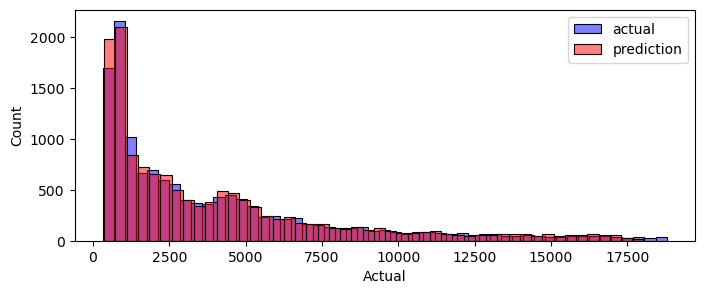

In [290]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## **Comparing all the Models**

In [291]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,4733.0
1,Actual,6424.0
2,Actual,5510.0
3,Actual,8770.0
4,Actual,4493.0


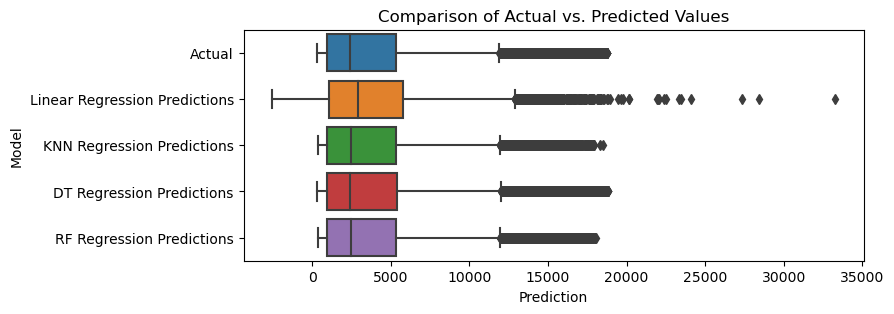

In [292]:
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()

In [293]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [294]:
X = df.drop(columns=['depth', 'table', 'x', 'y', 'z', 'price'])

y = df['price']

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37758, 4) (37758,)
(16182, 4) (16182,)


In [297]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [298]:
std_scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,carat
16259,0.445813
24005,1.562356
12211,0.740749
37918,-0.818197
181,-0.544328


In [299]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,carat,cut,color,clarity
16259,0.445813,4.0,3.0,4.0
24005,1.562356,4.0,2.0,5.0
12211,0.740749,2.0,5.0,1.0
37918,-0.818197,4.0,4.0,4.0
181,-0.544328,4.0,5.0,5.0


In [300]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [301]:

X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                   columns = std_scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,carat
10176,0.635415
16083,1.035685
13420,0.846083
20407,1.478088
8909,0.214078


In [302]:

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,carat,cut,color,clarity
10176,0.635415,4.0,2.0,1.0
16083,1.035685,4.0,2.0,2.0
13420,0.846083,3.0,1.0,2.0
20407,1.478088,4.0,4.0,2.0
8909,0.214078,2.0,4.0,3.0


In [303]:
print(X_train_transformed.isna().sum())
print(X_test_transformed.isna().sum())


carat      2697
cut           0
color         0
clarity       0
dtype: int64
carat         0
cut        2697
color      2697
clarity    2697
dtype: int64


In [304]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values